# Read in CSV and establish Datetime

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime

data_file = os.path.join("clean_df.csv")
all_data = pd.read_csv(data_file)
all_data.drop(columns="Unnamed: 0", inplace = True)

all_data

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
196677,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False
196678,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False
196679,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False
196680,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False


In [2]:
# # put date in datetime format
# all_data["date"] = pd.to_datetime(all_data["date"],format="%Y/%m/%d")

In [3]:
# Create yearmonth column to use to group dates later
all_data['date'] = pd.to_datetime(all_data['date'])
all_data["yearmonth"] = all_data['date'].apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=1)) 
all_data["year"] = all_data["date"].dt.year
all_data

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year
0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017-12-01,2017
1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017-12-01,2017
2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017-12-01,2017
3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017-12-01,2017
4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017-12-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
196677,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020-09-01,2020
196678,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020-09-01,2020
196679,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020-09-01,2020
196680,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020-09-01,2020


In [40]:
# Create the dataframes
cubs_all = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "Cubs"])
bears_all = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "Bears"])
blackhawks_all = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "Blackhawks"])
bulls_all = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "Bulls"])
whitesox_all = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "White Sox"])

In [45]:
cubs_all_sum = all_data.loc[all_data['Cubs'] == True, 'rides'].sum()
bears_all_sum = all_data.loc[all_data['Bears'] == True, 'rides'].sum()
blackhawks_all_sum = all_data.loc[all_data['Blackhawks'] == True, 'rides'].sum()
bulls_all_sum = all_data.loc[all_data['Bulls'] == True, 'rides'].sum()
whitesox_all_sum = all_data.loc[all_data['White Sox'] == True, 'rides'].sum()

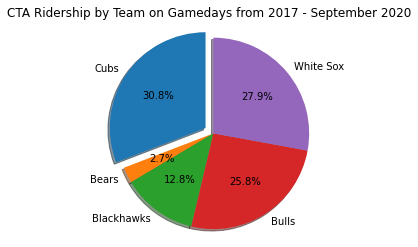

In [48]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cubs', 'Bears', 'Blackhawks', 'Bulls', 'White Sox'
sizes = cubs_all_sum, bears_all_sum, blackhawks_all_sum, bulls_all_sum, whitesox_all_sum
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CTA Ridership by Team on Gamedays from 2017 - September 2020")
plt.show()

In [4]:
# Locate rows where year is 2020
all_data_2020 = all_data.loc[(all_data["year"] == 2020)]
# all_data_2020.sort_values(by=["month"], ascending = True)
all_data_2020.head()

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year
87404,40010,Austin-Forest Park,2020-03-01,U,511,False,False,False,False,False,2020-03-01,2020
87405,40010,Austin-Forest Park,2020-03-02,W,1686,False,False,True,False,False,2020-03-01,2020
87406,40010,Austin-Forest Park,2020-03-03,W,1801,True,False,False,False,False,2020-03-01,2020
87407,40010,Austin-Forest Park,2020-03-04,W,1779,False,False,True,False,False,2020-03-01,2020
87408,40010,Austin-Forest Park,2020-03-05,W,1750,True,False,False,False,False,2020-03-01,2020


# All Teams 2020 Analysis

In [5]:
# filter all gamedays for 2020
all_2020_gameday_df = all_data_2020[(all_data_2020["Blackhawks"]== True) | (all_data_2020["Cubs"]== True) | (all_data_2020["Bulls"]== True) | (all_data_2020["Bears"]== True) | (all_data_2020["White Sox"]== True)]

# filter all non-gamedays for 2020
all_2020_nongameday_df = all_data_2020[(all_data_2020["Blackhawks"]== False) & (all_data_2020["Cubs"]== False) & (all_data_2020["Bulls"]== False) & (all_data_2020["Bears"]== False) & (all_data_2020["White Sox"]== False)]

# Collect all 2020 gameday averages by day type
gameday_2020_mean = all_2020_gameday_df['rides'].mean()
weekday_2020_gameday_mean = all_2020_gameday_df.loc[all_2020_gameday_df['daytype'] == 'W', 'rides'].mean()
saturday_2020_gameday_mean = all_2020_gameday_df.loc[all_2020_gameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_2020_gameday_mean = all_2020_gameday_df.loc[all_2020_gameday_df['daytype'] == 'U', 'rides'].mean()

# Collect all 2020 nongameday averages by day type
nongameday_2020_mean = all_2020_nongameday_df['rides'].mean()
weekday_2020_nongameday_mean = all_2020_nongameday_df.loc[all_2020_nongameday_df['daytype'] == 'W', 'rides'].mean()
saturday_2020_nongameday_mean = all_2020_nongameday_df.loc[all_2020_nongameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_2020_nongameday_mean = all_2020_nongameday_df.loc[all_2020_nongameday_df['daytype'] == 'U', 'rides'].mean()

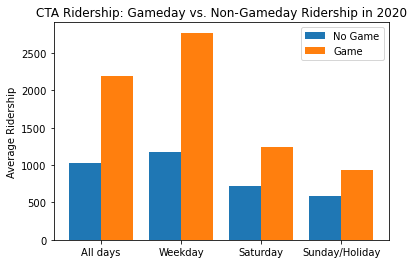

In [22]:
# Graph all team 2020 average ridership by day type
labels = ["All days", "Weekday", "Saturday", "Sunday/Holiday"]
nongameday_2020_means = [nongameday_2020_mean, weekday_2020_nongameday_mean, saturday_2020_nongameday_mean, sundayholiday_2020_nongameday_mean]
gameday_2020_means = [gameday_2020_mean, weekday_2020_gameday_mean, saturday_2020_gameday_mean, sundayholiday_2020_gameday_mean]

x = np.arange(len(labels))
w = 0.4

fig, ax = plt.subplots()
bar1 = ax.bar(x - w/2, nongameday_2020_means, w, label='No Game')
bar2 = ax.bar(x + w/2, gameday_2020_means, w, label='Game')

ax.set_ylabel('Average Ridership')
ax.set_title('CTA Ridership: Gameday vs. Non-Gameday Ridership in 2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [20]:
# filter all gamedays for 2020
all_gameday_df = all_data[(all_data["Blackhawks"]== True) | (all_data["Cubs"]== True) | (all_data["Bulls"]== True) | (all_data["Bears"]== True) | (all_data["White Sox"]== True)]

# filter all non-gamedays for 2020
all_nongameday_df = all_data[(all_data["Blackhawks"]== False) & (all_data["Cubs"]== False) & (all_data["Bulls"]== False) & (all_data["Bears"]== False) & (all_data["White Sox"]== False)]

# Collect all 2020 gameday averages by day type
gameday_mean = all_gameday_df['rides'].mean()
weekday_gameday_mean = all_gameday_df.loc[all_gameday_df['daytype'] == 'W', 'rides'].mean()
saturday_gameday_mean = all_gameday_df.loc[all_gameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_gameday_mean = all_gameday_df.loc[all_gameday_df['daytype'] == 'U', 'rides'].mean()

# Collect all 2020 nongameday averages by day type
nongameday_mean = all_nongameday_df['rides'].mean()
weekday_nongameday_mean = all_nongameday_df.loc[all_nongameday_df['daytype'] == 'W', 'rides'].mean()
saturday_nongameday_mean = all_nongameday_df.loc[all_nongameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_nongameday_mean = all_nongameday_df.loc[all_nongameday_df['daytype'] == 'U', 'rides'].mean()

In [35]:
gameday_mean

3360.0960155218977

In [36]:
nongameday_mean

2682.786769264432

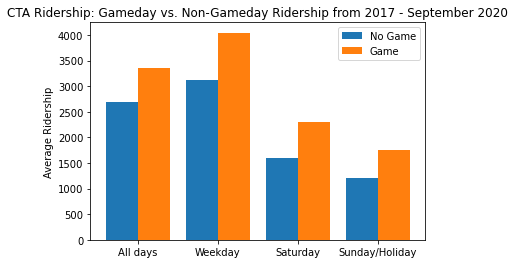

In [21]:
# Graph all team 2020 average ridership by day type
labels = ["All days", "Weekday", "Saturday", "Sunday/Holiday"]
nongameday_means = [nongameday_mean, weekday_nongameday_mean, saturday_nongameday_mean, sundayholiday_nongameday_mean]
gameday_means = [gameday_mean, weekday_gameday_mean, saturday_gameday_mean, sundayholiday_gameday_mean]

x = np.arange(len(labels))
w = 0.4

fig, ax = plt.subplots()
bar1 = ax.bar(x - w/2, nongameday_means, w, label='No Game')
bar2 = ax.bar(x + w/2, gameday_means, w, label='Game')

ax.set_ylabel('Average Ridership')
ax.set_title('CTA Ridership: Gameday vs. Non-Gameday Ridership from 2017 - September 2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Text(0, 0.5, 'Thousands')

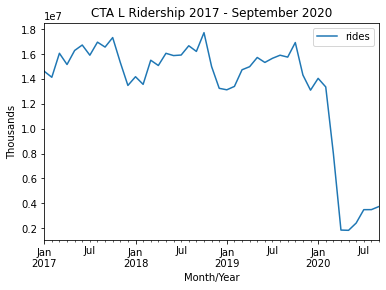

In [19]:
# Plot a line graph of ridership by month throughout 2020
grouped_months = all_data.groupby("yearmonth").sum("rides")
grouped_months.reset_index(inplace = True)
grouped_months.plot.line(x = "yearmonth", y="rides")
plt.title("CTA L Ridership 2017 - September 2020")
plt.xlabel("Month/Year")
plt.ylabel("Thousands")

# Cubs Analysis

In [49]:
# Create a DF just for Cubs data 
cubs_df = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "yearmonth", "Cubs"])

# Filter for the Cubs stations
cubs_df = cubs_df.loc[(cubs_df["station_id"] == 41420) | (cubs_df["station_id"] == 41320)]
cubs_df

,station_id,stationname,date,daytype,rides,yearmonth,Cubs
9,41420,Addison-North Main,2017-12-19,W,6034,2017-12-01,False
67,41320,Belmont-North Main,2017-12-28,W,6981,2017-12-01,False
141,41320,Belmont-North Main,2017-12-12,W,11192,2017-12-01,False
293,41420,Addison-North Main,2017-12-06,W,6136,2017-12-01,False
430,41420,Addison-North Main,2017-12-22,W,4848,2017-12-01,False
...,...,...,...,...,...,...,...
196287,41420,Addison-North Main,2020-09-26,A,1364,2020-09-01,False
196288,41420,Addison-North Main,2020-09-27,U,1044,2020-09-01,False
196289,41420,Addison-North Main,2020-09-28,W,1128,2020-09-01,False
196290,41420,Addison-North Main,2020-09-29,W,1198,2020-09-01,False


Text(0, 0.5, 'Thousands')

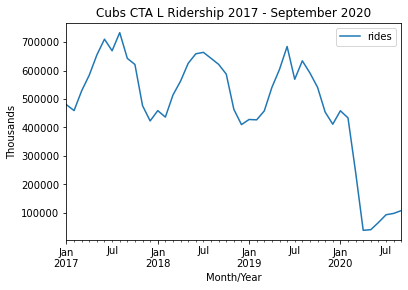

In [51]:
# Plot a line graph of ridership by month throughout 2020
grouped_months = cubs_df.groupby("yearmonth").sum("rides")
grouped_months.reset_index(inplace = True)
grouped_months.plot.line(x = "yearmonth", y="rides")
plt.title("Cubs CTA L Ridership 2017 - September 2020")
plt.xlabel("Month/Year")
plt.ylabel("Thousands")

In [9]:
# Filter down to just gamedays for Cubs
cubs_gameday_df = cubs_df[cubs_df["Cubs"]== True]
# cubs_gameday_df

# Get summary stats
cubs_gameday_df.describe()

,station_id,rides
count,546.000000,546.000000
mean,41370.000000,11194.217949
std,50.045851,4199.441145
min,41320.000000,739.000000
25%,41320.000000,10042.250000
50%,41370.000000,12256.000000
75%,41420.000000,13575.750000
max,41420.000000,27679.000000


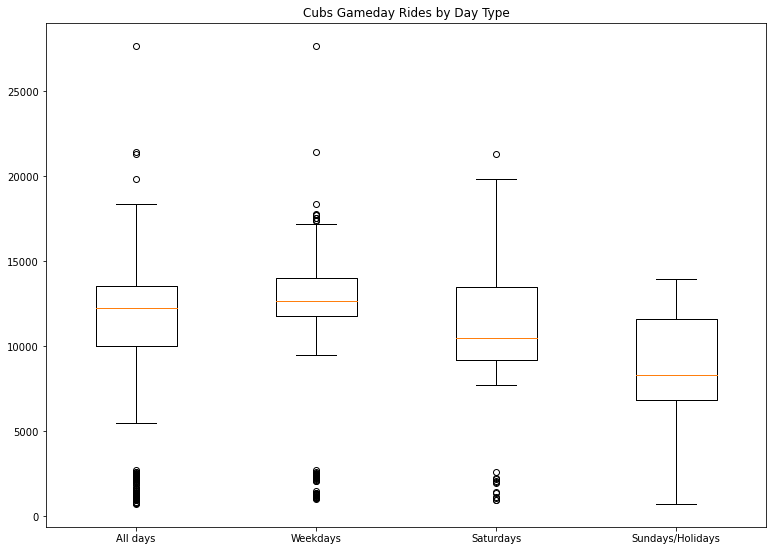

In [10]:
# Plot a boxplot of gameday rides for Cubs
labels = ["All days", "Weekdays", "Saturdays", "Sundays/Holidays"]
box_1 = cubs_gameday_df["rides"]
box_2 = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'W', 'rides']
box_3 = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'A', 'rides']
box_4 = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'U', 'rides']
boxes = [box_1, box_2, box_3, box_4]

fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Cubs Gameday Rides by Day Type')
  
bp = ax.boxplot(boxes, labels=labels) 
  
plt.show()

In [11]:
cubs_nongameday_df = cubs_df[cubs_df["Cubs"]== False]
cubs_nongameday_df

,station_id,stationname,date,daytype,rides,yearmonth,Cubs
9,41420,Addison-North Main,2017-12-19,W,6034,2017-12-01,False
67,41320,Belmont-North Main,2017-12-28,W,6981,2017-12-01,False
141,41320,Belmont-North Main,2017-12-12,W,11192,2017-12-01,False
293,41420,Addison-North Main,2017-12-06,W,6136,2017-12-01,False
430,41420,Addison-North Main,2017-12-22,W,4848,2017-12-01,False
...,...,...,...,...,...,...,...
196286,41420,Addison-North Main,2020-09-25,W,1538,2020-09-01,False
196287,41420,Addison-North Main,2020-09-26,A,1364,2020-09-01,False
196288,41420,Addison-North Main,2020-09-27,U,1044,2020-09-01,False
196289,41420,Addison-North Main,2020-09-28,W,1128,2020-09-01,False


In [12]:
cubs_nongameday_df.describe()

,station_id,rides
count,2192.000000,2192.000000
mean,41370.000000,7043.042883
std,50.011409,3914.935949
min,41320.000000,40.000000
25%,41320.000000,4329.250000
50%,41370.000000,6576.500000
75%,41420.000000,11127.750000
max,41420.000000,29581.000000


In [13]:
# Collect all gameday averages by day type
gameday_mean = cubs_gameday_df['rides'].mean()
weekday_gameday_mean = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'W', 'rides'].mean()
saturday_gameday_mean = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_gameday_mean = cubs_gameday_df.loc[cubs_gameday_df['daytype'] == 'U', 'rides'].mean()

# Collect all nongameday averages by day type
nongameday_mean = cubs_nongameday_df['rides'].mean()
weekday_nongameday_mean = cubs_nongameday_df.loc[cubs_nongameday_df['daytype'] == 'W', 'rides'].mean()
saturday_nongameday_mean = cubs_nongameday_df.loc[cubs_nongameday_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_nongameday_mean = cubs_nongameday_df.loc[cubs_nongameday_df['daytype'] == 'U', 'rides'].mean()

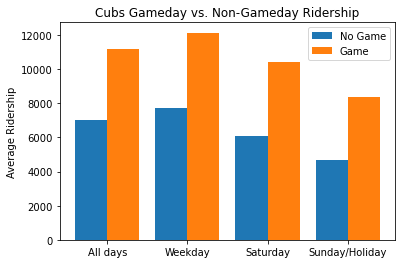

In [14]:
labels = ["All days", "Weekday", "Saturday", "Sunday/Holiday"]
nongameday_means = [nongameday_mean, weekday_nongameday_mean, saturday_nongameday_mean, sundayholiday_nongameday_mean]
gameday_means = [gameday_mean, weekday_gameday_mean, saturday_gameday_mean, sundayholiday_gameday_mean]

x = np.arange(len(labels))
w = 0.4

fig, ax = plt.subplots()
bar1 = ax.bar(x - w/2, nongameday_means, w, label='No Game')
bar2 = ax.bar(x + w/2, gameday_means, w, label='Game')

ax.set_ylabel('Average Ridership')
ax.set_title('Cubs Gameday vs. Non-Gameday Ridership')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Text(0.5, 1.0, 'Cubs Ridership by Month (2017-2020)')

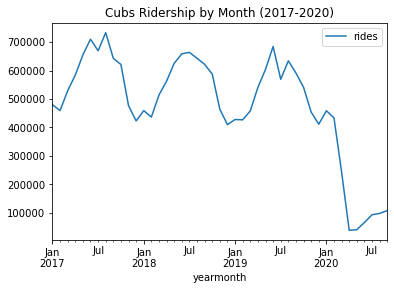

In [15]:
# Plot a line graph of Cubs ridership by month
cubs_grouped_months = cubs_df.groupby("yearmonth").sum("rides")
cubs_grouped_months.reset_index(inplace = True)
cubs_grouped_months.plot.line(x = "yearmonth", y="rides")
plt.title("Cubs Ridership by Month (2017-2020)")

# Pie Charts